In [1]:
import pandas as pd
import re

In [2]:
df = pd.read_csv("/home/phani/Downloads/Data/551982_1387024_bundle_archive/metadata.csv")
df.head()

/home/phani/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,1.14726e+07,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,1.1668e+07,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,1.1668e+07,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,1.16869e+07,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,1.16869e+07,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [3]:
df.shape

(204823, 19)

In [4]:
#Selecting a specific columns
df1 = df[['title', 'abstract', 'url', 'authors', 'source_x', 'publish_time']]
df1.head()

,title,abstract,url,authors,source_x,publish_time
0,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,"Madani, Tariq A; Al-Ghamdi, Aisha A",PMC,2001-07-04
1,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,"Vliet, Albert van der; Eiserich, Jason P; Cros...",PMC,2000-08-15
2,Surfactant protein-D and pulmonary host defense,Surfactant protein-D (SP-D) participates in th...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,"Crouch, Erika C",PMC,2000-08-25
3,Role of endothelin-1 in lung disease,Endothelin-1 (ET-1) is a 21 amino acid peptide...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",PMC,2001-02-22
4,Gene expression in epithelial cells in respons...,Respiratory syncytial virus (RSV) and pneumoni...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",PMC,2001-05-11


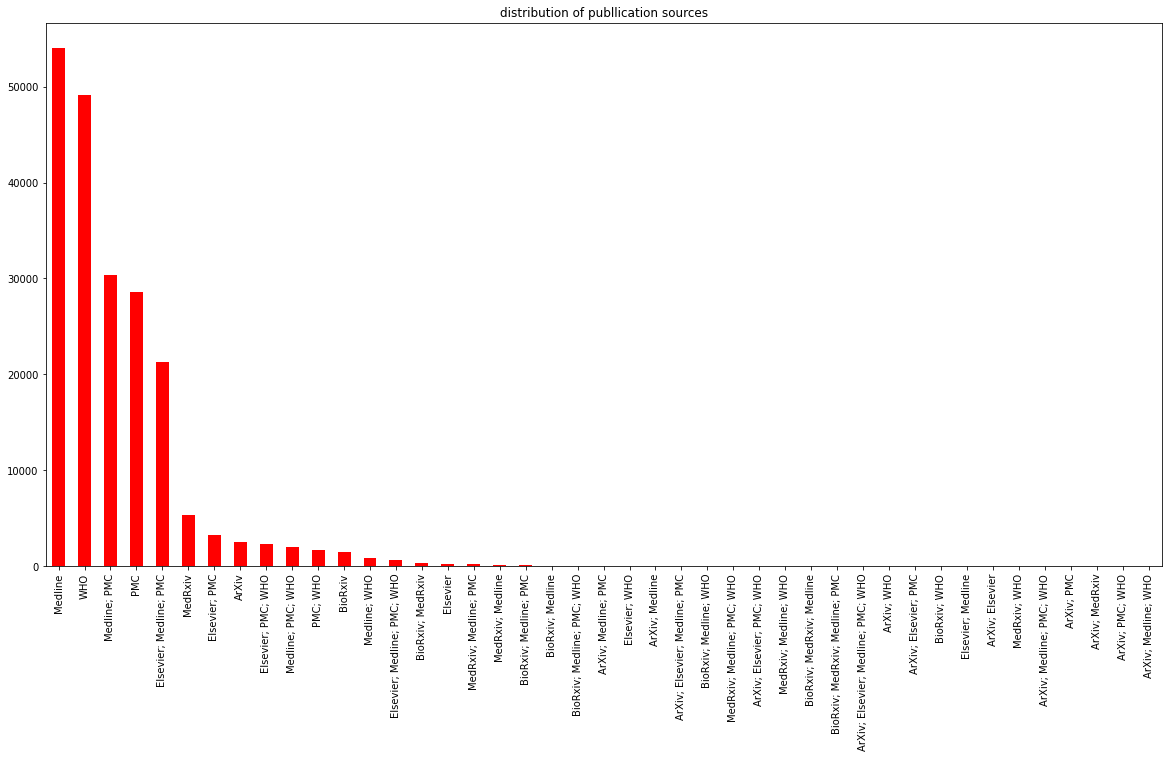

In [5]:
df1.source_x.value_counts(ascending=False)\
    .plot(kind = 'bar', title = 'distribution of publlication sources',color='red', figsize = (20,10));

In [6]:
yearList = []
for y in df1["publish_time"][df1["publish_time"].notnull()]:
    yearList.append(int(re.split(' |-', y)[0]))

Text(0, 0.5, 'Frequency')

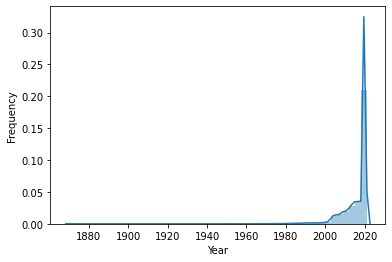

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(yearList, bins = 50)
plt.xlabel("Year")
plt.ylabel("Frequency")

In [8]:
#separate each word in the ABSTRACT column
df1['words'] = df1.abstract.str.strip().str.split('[\W_]+')
df1['words'].head()

<ipython-input-8-54ad0516c47d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['words'] = df1.abstract.str.strip().str.split('[\W_]+')


0    [OBJECTIVE, This, retrospective, chart, review...
1    [Inflammatory, diseases, of, the, respiratory,...
2    [Surfactant, protein, D, SP, D, participates, ...
3    [Endothelin, 1, ET, 1, is, a, 21, amino, acid,...
4    [Respiratory, syncytial, virus, RSV, and, pneu...
Name: words, dtype: object

In [9]:
df1.head()

,title,abstract,url,authors,source_x,publish_time,words
0,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,"Madani, Tariq A; Al-Ghamdi, Aisha A",PMC,2001-07-04,"[OBJECTIVE, This, retrospective, chart, review..."
1,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,"Vliet, Albert van der; Eiserich, Jason P; Cros...",PMC,2000-08-15,"[Inflammatory, diseases, of, the, respiratory,..."
2,Surfactant protein-D and pulmonary host defense,Surfactant protein-D (SP-D) participates in th...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,"Crouch, Erika C",PMC,2000-08-25,"[Surfactant, protein, D, SP, D, participates, ..."
3,Role of endothelin-1 in lung disease,Endothelin-1 (ET-1) is a 21 amino acid peptide...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",PMC,2001-02-22,"[Endothelin, 1, ET, 1, is, a, 21, amino, acid,..."
4,Gene expression in epithelial cells in respons...,Respiratory syncytial virus (RSV) and pneumoni...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",PMC,2001-05-11,"[Respiratory, syncytial, virus, RSV, and, pneu..."


In [10]:
#separate words in the abstract column and create a new column
abstracts = df1[df1.words.str.len() > 0]

In [11]:
# saving the dataframe 
abstracts.to_csv('Journal_Abrstracts.csv') 

In [12]:
#display dataframe
abstracts.head(3)

,title,abstract,url,authors,source_x,publish_time,words
0,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,"Madani, Tariq A; Al-Ghamdi, Aisha A",PMC,2001-07-04,"[OBJECTIVE, This, retrospective, chart, review..."
1,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,"Vliet, Albert van der; Eiserich, Jason P; Cros...",PMC,2000-08-15,"[Inflammatory, diseases, of, the, respiratory,..."
2,Surfactant protein-D and pulmonary host defense,Surfactant protein-D (SP-D) participates in th...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,"Crouch, Erika C",PMC,2000-08-25,"[Surfactant, protein, D, SP, D, participates, ..."


In [13]:
abstracts.shape

(145853, 7)

# What has been published about ethical and social science considerations?

In [14]:
#looking for abstracts with specific terms among publications
#in the dataset provided by Kaggle
Q1A=abstracts[abstracts['abstract'].str.contains('ethical principles')]

Q1B=abstracts[abstracts['abstract'].str.contains('novel ethical issues')]

Q1C=abstracts[abstracts['abstract'].str.contains('support sustained education,access')]

Q1D=abstracts[abstracts['abstract'].str.contains('multidisciplinary research')]

Q1E=abstracts[abstracts['abstract'].str.contains('global networks of social sciences')]

Q1F=abstracts[abstracts['abstract'].str.contains('adherence to public health measures')]

Q1G=abstracts[abstracts['abstract'].str.contains('prevention and control')]

Q1H=abstracts[abstracts['abstract'].str.contains('use of surgical masks')]

Q1I=abstracts[abstracts['abstract'].str.contains('outbreak and implementing public health measures')]

Q1J=abstracts[abstracts['abstract'].str.contains('physical and psychological health')]

Q1K=abstracts[abstracts['abstract'].str.contains('fuel misinformation and rumor')]

Q1L=abstracts[abstracts['abstract'].str.contains('social media')]


In [15]:
# Concatenating the dataframes into one table per question
Question= pd.concat([Q1A, Q1B, Q1C, Q1D, Q1E, Q1F, Q1G, Q1H, Q1I, Q1J, Q1K, Q1L])

# dropping null value columns to avoid errors 
Question.dropna(inplace = True) 


In [16]:
Question.shape

(1781, 7)

In [17]:
#Relevant articles in the dataset to Q1
print("Published articles about ethical and social science considerations")
print()
Question.head()

Published articles about ethical and social science considerations



,title,abstract,url,authors,source_x,publish_time,words
11561,The Consent Form in the Chinese CRISPR Study: ...,This editorial provides an ethical analysis of...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,"Shaw, David",PMC,2020-01-03,"[This, editorial, provides, an, ethical, analy..."
11662,Medical Ethics in Extreme and Austere Environm...,American society has a history of turning to p...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,"Pingree, Christian S.; Newberry, Travis R.; Mc...",PMC,2020-03-14,"[American, society, has, a, history, of, turni..."
11731,Extracorporeal Life Support Organization Coron...,The Extracorporeal Life Support Organization (...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,"Shekar, Kiran; Badulak, Jenelle; Peek, Giles; ...",PMC,2020-05-12,"[The, Extracorporeal, Life, Support, Organizat..."
16607,Clinical Ethics and Professionalism,The act of confronting problems that are too l...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,"Ishibashi, Kimiko; Lewis, Shaye; Baker, Timothy",PMC,2016-04-01,"[The, act, of, confronting, problems, that, ar..."
20776,Chapter 4: Can Mandatory Vaccination of Health...,"Objectives: To discuss whether, during an infl...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,"Kotalik, Jaro",PMC,2006-11-09,"[Objectives, To, discuss, whether, during, an,..."


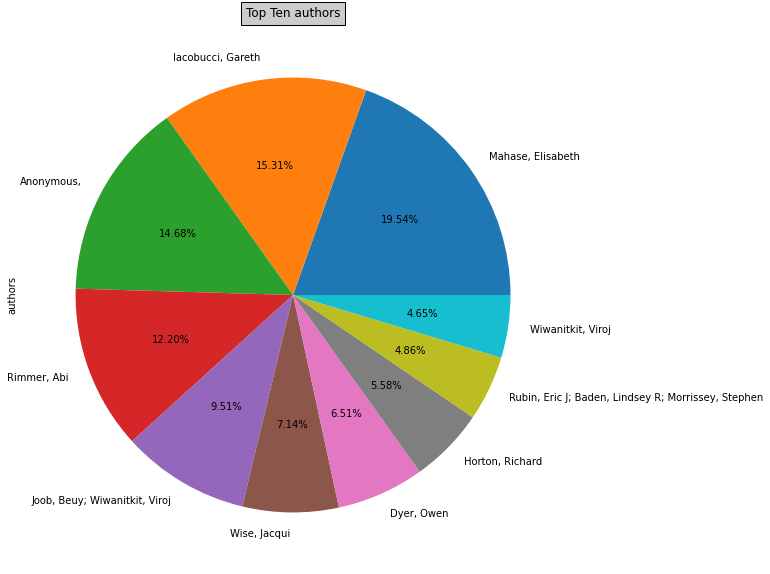

In [22]:
#Top 10 Authors
df1['authors'].value_counts().iloc[[0,1,2,3,4,5,6,7,8,9]].plot.pie(figsize = (10,10), autopct = '%.2f%%',
                                                                           title = 'Top Ten Active authors')
plt.title("Top Ten authors", bbox={'facecolor':'0.8', 'pad':5})
plt.savefig("Top Ten authors"+".png", bbox_inches='tight')

In [24]:
Question

,title,abstract,url,authors,words
11561,The Consent Form in the Chinese CRISPR Study: ...,This editorial provides an ethical analysis of...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,"Shaw, David","[This, editorial, provides, an, ethical, analy..."
11662,Medical Ethics in Extreme and Austere Environm...,American society has a history of turning to p...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,"Pingree, Christian S.; Newberry, Travis R.; Mc...","[American, society, has, a, history, of, turni..."
11731,Extracorporeal Life Support Organization Coron...,The Extracorporeal Life Support Organization (...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,"Shekar, Kiran; Badulak, Jenelle; Peek, Giles; ...","[The, Extracorporeal, Life, Support, Organizat..."
16607,Clinical Ethics and Professionalism,The act of confronting problems that are too l...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,"Ishibashi, Kimiko; Lewis, Shaye; Baker, Timothy","[The, act, of, confronting, problems, that, ar..."
20776,Chapter 4: Can Mandatory Vaccination of Health...,"Objectives: To discuss whether, during an infl...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,"Kotalik, Jaro","[Objectives, To, discuss, whether, during, an,..."
...,...,...,...,...,...
203855,Use of Obstetric Practice Web Sites to Distrib...,OBJECTIVE: To describe the current use of obst...,https://doi.org/10.1097/phh.0000000000000537; ...,"Lehnert, Jonathan D.; Ellingson, Mallory K.; G...","[OBJECTIVE, To, describe, the, current, use, o..."
203932,Public relations and customer service: Employe...,Social media has enhanced integration between ...,https://www.sciencedirect.com/science/article/...,"Sutherland, Karen; Freberg, Karen; Driver, Chr...","[Social, media, has, enhanced, integration, be..."
204483,Trustworthy Health-Related Tweets on Social Me...,BACKGROUND: Social media platforms play a vita...,https://doi.org/10.2196/14731; https://www.ncb...,"Albalawi, Yahya; Nikolov, Nikola S; Buckley, Jim","[BACKGROUND, Social, media, platforms, play, a..."
204521,Effect of COVID-19 related lockdown on ophthal...,"PURPOSE: In early 2020, the World Health Organ...",https://www.ncbi.nlm.nih.gov/pubmed/32317434/;...,"Nair, Akshay Gopinathan; Gandhi, Rashmin A; Na...","[PURPOSE, In, early, 2020, the, World, Health,..."
